# Linear Regression with Multiple Variables



This notebook is an implemention of Multiple Linear Regression to predict the prices of houses. Suppose we are selling a house and we want to know what a good market price would be. One way to do this is to
first collect information on recent houses sold and make a model of housing
prices.

The file 'data2_multi.txt' contains a training set of housing prices in Portland, Oregon. The first column is the size of the house (in square feet), the
second column is the number of bedrooms, and the third column is the price
of the house.

In [1]:
# Import the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from mpl_toolkits import mplot3d

%matplotlib inline

In [2]:
# Load the dataset as a numpy array
dataset_array = np.loadtxt('data2_multi.txt', delimiter=',')
m,n = dataset_array.shape

In [3]:
# Get independent and dependent variables from the dataset and store them in 'X' and 'y'
X = dataset_array[:, :n-1]
X = np.asmatrix(X)
y = dataset_array[:,-1]
y = y.reshape(m,1)
y = np.asmatrix(y)

In [4]:
# Print the shapes of the numpy arrays
X.shape, y.shape

((47, 2), (47, 1))

In [5]:
# Print first 5 rows of 'X'
X[:5,:]

matrix([[  2.10400000e+03,   3.00000000e+00],
        [  1.60000000e+03,   3.00000000e+00],
        [  2.40000000e+03,   3.00000000e+00],
        [  1.41600000e+03,   2.00000000e+00],
        [  3.00000000e+03,   4.00000000e+00]])

In [26]:
df.head()

,Sq. Ft.,No. of Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 3 columns):
Sq. Ft.            47 non-null int64
No. of Bedrooms    47 non-null int64
Price              47 non-null int64
dtypes: int64(3)
memory usage: 1.2 KB


In [28]:
df.describe()

,Sq. Ft.,No. of Bedrooms,Price
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


## Feature Normalization

By looking at the values in the dataset, we can see that house sizes are about
1000 times the number of bedrooms. If we were to run our regression algorithm on this data as-is, then the "Sq. Ft." variable would be weighted too heavily and would end up dwarfing any contributions from the "No. of Bedrooms" feature. When features differ by orders of magnitude, performing feature scaling can make gradient descent converge
much more quickly. One way to do this is by subtracting from each value in a feature the mean of that feature, and then dividing by the standard deviation.

In [29]:
mu = np.mean(X, axis=0)  # Calculate Mean
sigma = np.std(X, axis=0)   # Calculate Standard Deviation
X = (X - mu) / sigma  # Get standardized X values
X[:5, :]

matrix([[ 0.13141542, -0.22609337],
        [-0.5096407 , -0.22609337],
        [ 0.5079087 , -0.22609337],
        [-0.74367706, -1.5543919 ],
        [ 1.27107075,  1.10220517]])

In [30]:
# Adding column of 1's as the first column to get X0
X_new = np.ones((m, n))
X_new[:,1:] = X
X = X_new
X = np.asmatrix(X)
X[:5,:]   # Print first 5 rows of the new array

matrix([[ 1.        ,  0.13141542, -0.22609337],
        [ 1.        , -0.5096407 , -0.22609337],
        [ 1.        ,  0.5079087 , -0.22609337],
        [ 1.        , -0.74367706, -1.5543919 ],
        [ 1.        ,  1.27107075,  1.10220517]])

In [31]:
# Initialize theta to zeros and also initialize learning rate alpha
theta = np.zeros((n,1))
theta = np.asmatrix(theta)
iterations = 300
alpha = 0.01

## Computing Cost and Implementing Gradient Descent

This step is similar to how we calculated cost and gradient for Simple Linear Regression. Both our cost and gradient descent functions are using matrix operations so there is no change to the code necessary to handle multiple linear regression.

In [32]:
def computeCostMulti(X, y, theta):
    '''Compute cost for multiple linear regression'''

    m = len(y)         # number of training examples
    p = X * theta
    sqrderr = np.square(p - y)
    J=1/(2*m) * (np.sum(sqrderr))
    return J

In [33]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):
    '''Perform gradient descent to learn theta'''
    
    m = len(y);        # number of training examples
    n = theta.size
    J_history = np.zeros((num_iters, 1));
    
    for iterations in range(num_iters):
        
        # Loop Implementation
        p = X * theta
        s = np.multiply((p-y),X)
        delta = (1/m) * (s.sum(axis=0))
        
        for i in range(n):
            theta[i] = theta[i] - (alpha * delta[0,i])
        
        '''
        # Vectorized implementation
        p = (X * theta) - y                                   # (m x 1 vector)
        delta = (1/m) * np.transpose(np.transpose(p) * X)     # ((n+1) x 1 vector)
        theta = theta - (alpha * delta)                       # ((n+1) x 1 vector)
        '''
        
        # Save the cost J in every iteration    
        J_history[iterations] = computeCostMulti(X, y, theta)
    
    return theta, J_history

In [34]:
theta, J_history = gradientDescentMulti(X, y, theta, alpha, iterations)
theta

matrix([[ 323718.51839575],
        [  93537.02912926],
        [   8412.36276572]])

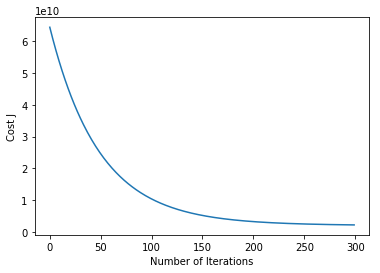

In [35]:
# Plot the cost of each iteration to visualize how J reaches its minimum
plt.plot(range(len(J_history)), J_history)
plt.xlabel('Number of Iterations')
plt.ylabel('Cost J')
plt.show()

### Predicting price of a 1650 sq. ft., 3 bedroom house

In [36]:
[1,1650,3]*theta

matrix([[  1.54685054e+08]])